In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_06.ipynb")

In [2]:
rng_seed = 42

# Homework 6

## K-Means Image Analysis, Neural Networks

## Problem 1: Flower Image Analysis
### 1) Objective

Before Convolutional Neural Networks (CNN) became available, K-means was an efficient method to segment images. Each pixel is represented by its RGB color vector. If we assume that pixel which belong to the same object should have the same color, then K-means should be able to cluster the pixel accordingly and therefore segment the image.<br> 
We want to analyze the Oxford 102 Flower Dataset using K-means clustering, hierarchical clustering, and decision tree classification and later in the course compare the results we obtain here to what we obtain using CNNs.<br>
<br>

### 2) Preparation

Before starting, we need to import the necessary libraries for data analysis and visualization.<br>
First, we import the standard libraries: 

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
from scipy.spatial.distance import pdist, squareform

Next, we need to load the dataset from `torchvision`

In [4]:
from torchvision.datasets import Flowers102 #pip install torchvision if necessary

Finally, we import our clustering methods:

In [5]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<br>

The dataset from `torchvision` contains various flower images and their corresponding labels.<br>
Run the following lines (it might take a few minutes!).

In [6]:
transforms = lambda x: np.array(x) / 255
dataset_train = Flowers102(root='Data', split='train', download=True, transform=transforms)
dataset_val = Flowers102(root='Data', split='val', download=True, transform=transforms)
dataset_test = Flowers102(root='Data', split='test', download=True, transform=transforms)
labels_train = np.array(dataset_train._labels)
labels_val = np.array(dataset_val._labels)
labels_test = np.array(dataset_test._labels)

In [7]:
classes = np.array(["pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea","english marigold","tiger lily", "moon orchid",
    "bird of paradise", "monkshood","globe thistle", "snapdragon","colt's foot","king protea","spear thistle","yellow iris","globe-flower",
    "purple coneflower", "peruvian lily", "balloon flower", "giant white arum lily","fire lily","pincushion flower", "fritillary", "red ginger",
    "grape hyacinth","corn poppy", "prince of wales feathers","stemless gentian","artichoke","sweet william","carnation", "garden phlox",
    "love in the mist","mexican aster", "alpine sea holly", "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",  "lenten rose",
    "barbeton daisy", "daffodil", "sword lily", "poinsettia", "bolero deep blue", "wallflower","marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy","primula", "sunflower","pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?","cautleya spicata", "japanese anemone", "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania", "azalea", "water lily","rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow", "magnolia",
    "cyclamen",  "watercress", "canna lily", "hippeastrum", "bee balm", "ball moss", "foxglove", "bougainvillea","camellia","mallow","mexican petunia",
    "bromelia", "blanket flower", "trumpet creeper", "blackberry lily"])

<!-- BEGIN QUESTION -->

<br>

2.1) We can display images in python using `plt.imshow(x)`, where *x* is the image. Show the first image from the dataset to understand what the data looks like.

Text(0.5, 1.0, 'pink primrose')

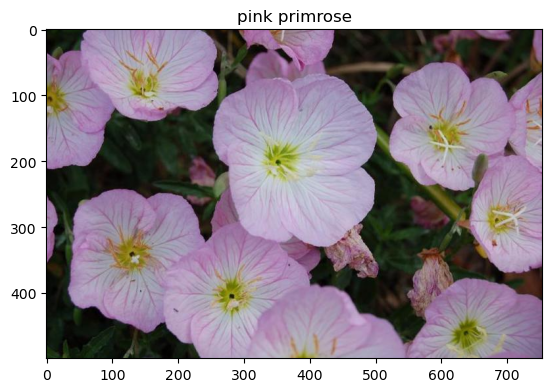

In [8]:
index = 0 #first image
x, y = dataset_train[index] #x: image, y: the label, classes[y]: the actual name of the flower (type str) 

######## Fill in the code below ########
plt.imshow(x)
plt.title(classes[y])
########################################

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

2.2) Print the shape and type of the image. Generate three plots, each showing the image only in one color channel in gray scale (`cmap='gray'`)! 

Shape: (500, 754, 3)
Type: <class 'numpy.ndarray'>


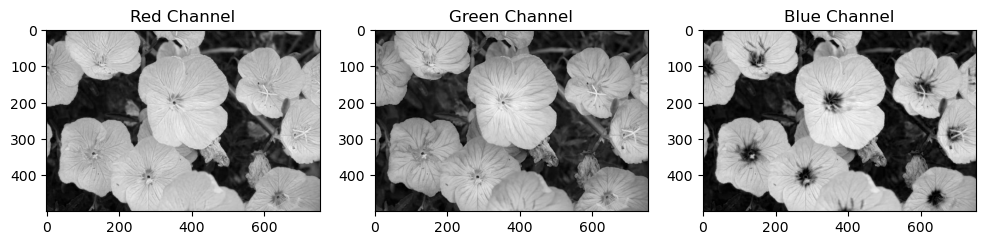

In [9]:
######## Fill in the code below ########
print("Shape:", x.shape)
print("Type:", type(x))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# R channel
axes[0].imshow(x[:, :, 0], cmap='gray')
axes[0].set_title('Red Channel')

# G channel
axes[1].imshow(x[:, :, 1], cmap='gray')
axes[1].set_title('Green Channel')

# B channel
axes[2].imshow(x[:, :, 2], cmap='gray')
axes[2].set_title('Blue Channel')

plt.show()
########################################

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

2.3) Show an image in the first 8 classes from the dataset to understand what the data looks like.

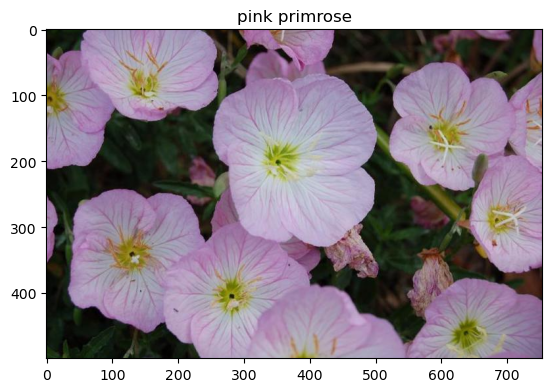

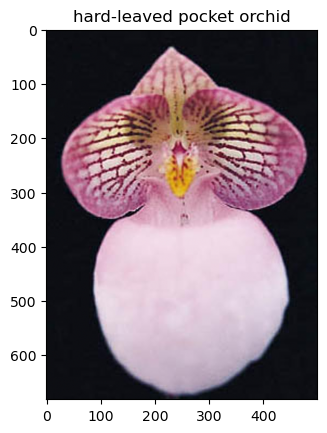

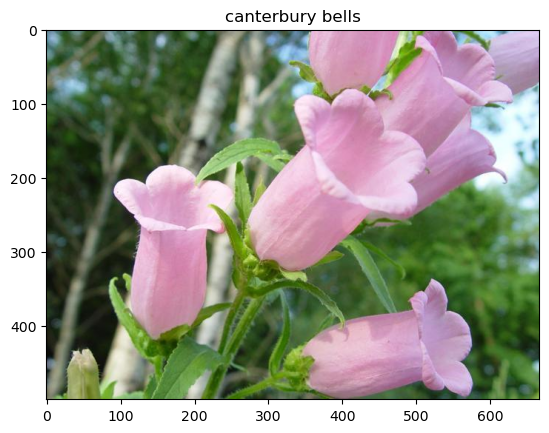

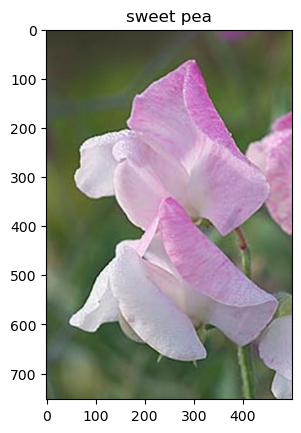

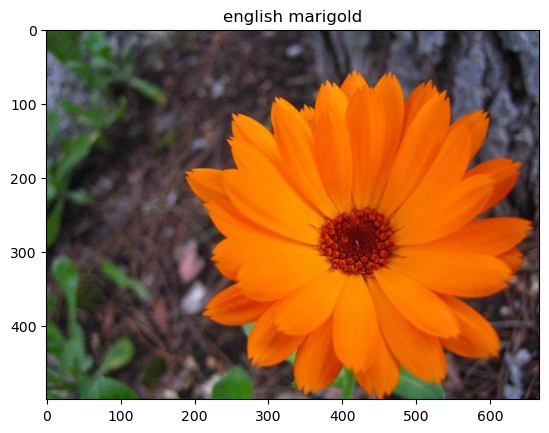

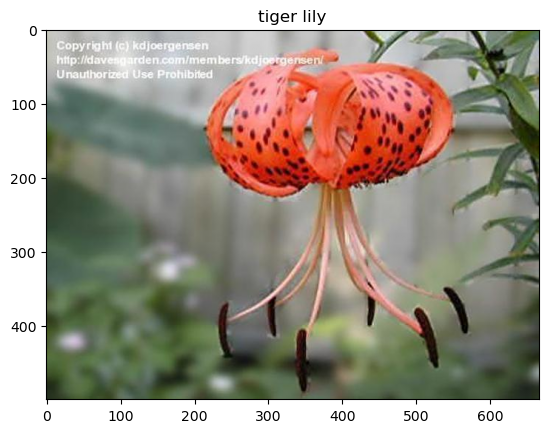

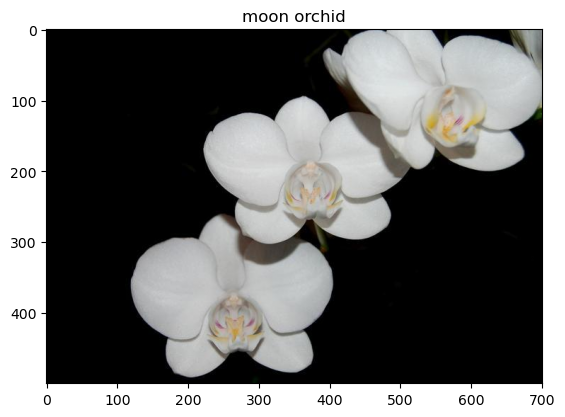

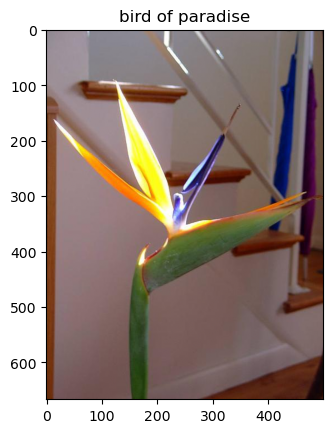

In [10]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]

######## Fill in the code below ########
for idx in indices:
    x, y = dataset_train[idx]
    plt.figure()
    plt.imshow(x)
    plt.title(classes[y])
    plt.show()
########################################

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

### 3) Image Segmentation

3.1) Segment the first image in the training set using K-means clustering. Reshape the image into a 2D array where each row represents a pixel and each column represents a color channel (RGB), and then apply K-means clustering to cluster the pixels. Visualize the segmented image and discuss what you observe.

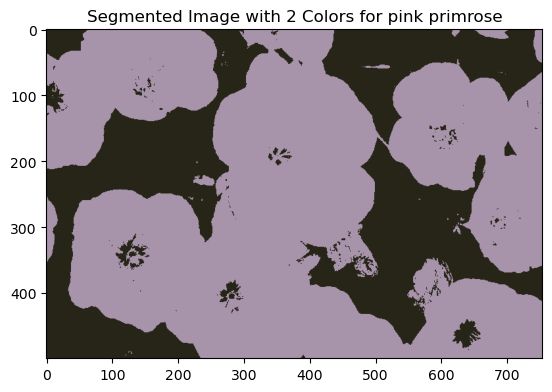

In [11]:
index = 0

######## Fill in the code below ########
K = 2
x, y = dataset_train[index]
x = x.reshape(-1, 3) 
kmeans = KMeans(n_clusters=K, random_state=rng_seed)
kmeans.fit(x)
labels = kmeans.labels_
colors = kmeans.cluster_centers_
segmented_img = colors[labels].reshape(dataset_train[0][0].shape)
plt.imshow(segmented_img)
plt.title(f'Segmented Image with {K} Colors for {classes[y]}')
plt.show()
########################################
#When using K-means clustering to segment this image, K=2 can roughly separate the flowers and background in the image.
#When K=3 or higher, it can roughly separate different parts of the flowers in the image and reduce classification errors 
#(such as the problem of classifying the flower's stamen as background in the image).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

> The segmented image shows distinct color regions corresponding to different parts of the flower and background. Visually, the first cluster represents the background, the second cluster represents the flower, and the third cluster represents the stems. This segmentation helps in identifying different components of the image based on color similarity.

3.2) Visualize the center of each cluster as a color using `plt.imshow(colors.reshape(.., .., ..))`. What does this tell you about the image?

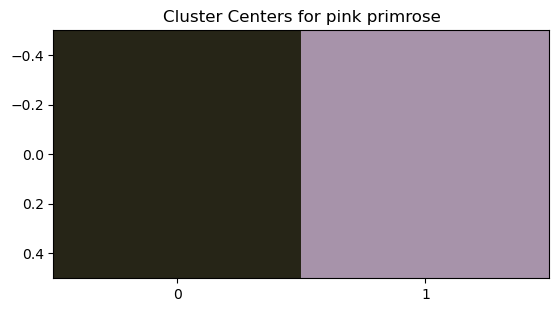

In [12]:
######## Fill in the code below ########
# Visualize cluster centers as colors
colors_reshaped = colors.reshape(1, K, 3)
plt.imshow(colors_reshaped)
plt.title(f'Cluster Centers for {classes[y]}')
plt.xticks(range(K))
plt.show()
########################################
#When clustering with K=2, the image is divided into two categories: background and flowers. 
#The former has lower brightness, while the latter has higher brightness. 
#The clustering mainly occurs in the brightness direction.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

> The cluster centers represent the dominant colors in the image. The first cluster center is a shade of dark green corresponding to the ground, the second cluster center is a shade of pinkish purple corresponding to the flower, and the third cluster center is a shade of brown corresponding to the stems. This indicates that the image has distinct color regions that can be effectively captured using K-means clustering.

3.3) Reconstruct the image using the cluster centers and the labels assigned to each pixel. Does the reconstructed image capture the main features of the original image? Discuss your observations.

_Type your answer here, replacing this text._

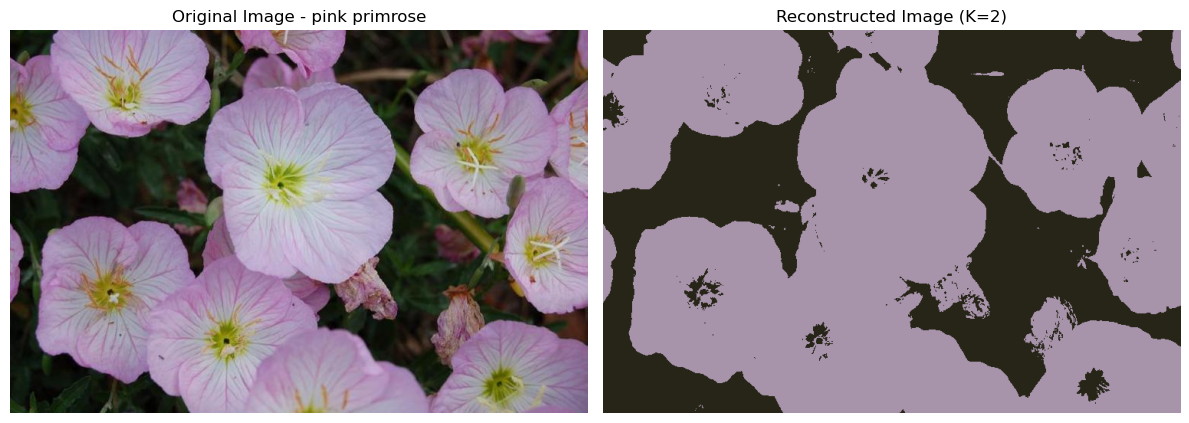

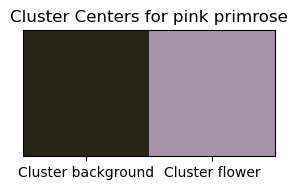

In [13]:
######## Fill in the code below ########
segmentation = ['background', 'flower']
# Reconstruct the image using cluster centers
original_shape = dataset_train[index][0].shape
reconstructed_img = colors[labels].reshape(original_shape)

# Display original and reconstructed images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(x.reshape(original_shape))
axes[0].set_title(f'Original Image - {classes[y]}')
axes[0].axis('off')

axes[1].imshow(reconstructed_img)
axes[1].set_title(f'Reconstructed Image (K={K})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Display cluster centers with labels
fig, ax = plt.subplots(figsize=(8, 2))
colors_reshaped = colors.reshape(1, K, 3)
ax.imshow(colors_reshaped)
ax.set_title(f'Cluster Centers for {classes[y]}')
ax.set_xticks(range(K))
ax.set_xticklabels([f'Cluster {segmentation[i]}' for i in range(K)])
ax.set_yticks([])
plt.tight_layout()
plt.show()
########################################

#The clustering results here are relatively clear, with background and flowers, but because the classification is based solely on color, 
#the centers of flowers with colors close to the background are also classified as background, 
#while petals in the background with colors close to flowers can also be classified into the flower category.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 4) Image Clustering

4.1) Use hierarchical clustering (`sns.clustermap`) to cluster the first 8 classes of images in the training set. Compute the mean color of the first image in the class and use the mean colors as features. Next, based on the mean colors, generate a distance square matrix (you can use `pdist(your_means, metric='euclidean')`) for clustering. Visualize the resulting dendrogram and discuss what you observe.

Using average color classification, group most flowers with similar colors into similar parts, and use hierarchical clustering to classify them from a color perspective, and be able to distinguish how large the color difference is between the two types of flowers. For example, although English marigold and moon orchid are grouped together, the distance between them is very large, and they are actually grouped together due to brightness.

/Users/zhengxiaoyang/miniconda/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/zhengxiaoyang/miniconda/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


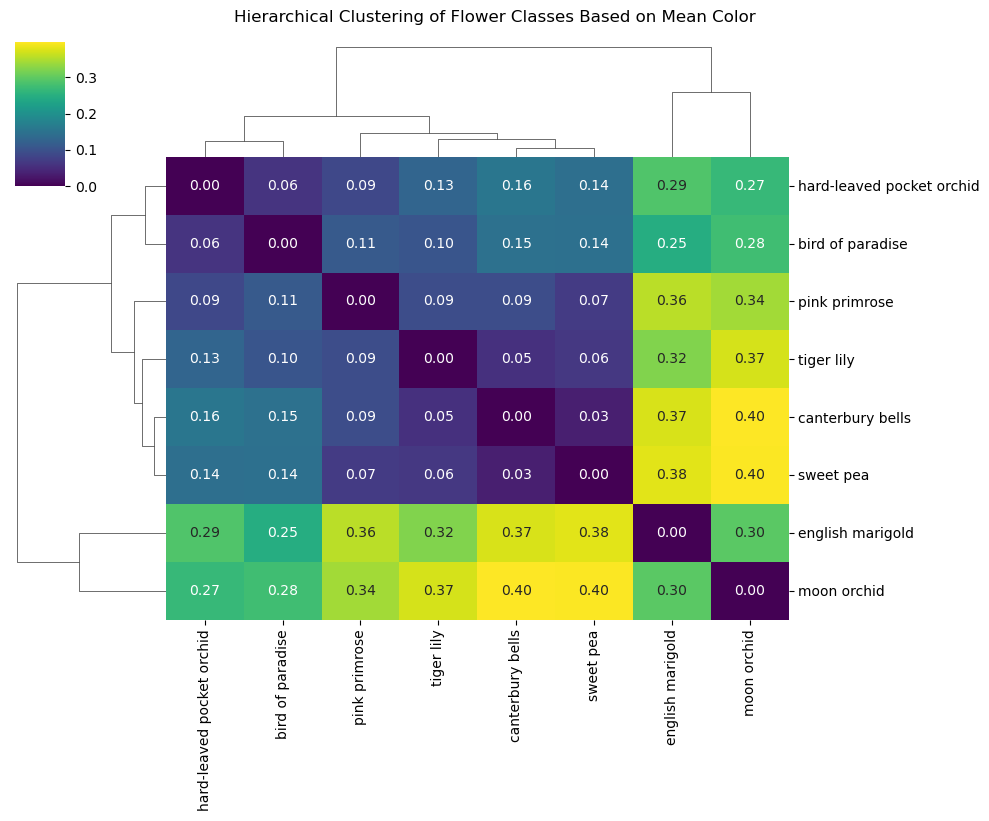

In [14]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]
ticks = classes[labels_train[indices]]

######## Fill in the code below ########
#mean color
mean_colors = []
for idx in indices:
    x, y = dataset_train[idx]
    mean_color = x.reshape(-1, 3).mean(axis=0)
    mean_colors.append(mean_color)

mean_colors = np.array(mean_colors)

#pairwise distance matrix
distances = pdist(mean_colors, metric='euclidean')
distance_matrix = squareform(distances)

sns.clustermap(distance_matrix, 
               xticklabels=ticks, 
               yticklabels=ticks,
               cmap='viridis',
               figsize=(10, 8),
               annot=True,
               fmt='.2f')
plt.suptitle('Hierarchical Clustering of Flower Classes Based on Mean Color', y=1.02)
plt.show()
########################################

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

### 5) Classification

5.1) Perform decision tree classification using `DecisionTreeClassifier` to predict the flower species based on the features from the K-means clustering. Train the decision tree classifier for class 0 (pink primrose) and class 4 (english marigold) on the training set and evaluate its performance on the validation set by creating a **confusion matrix plot** for both, training and evaluation set. Discuss why or why not the features from K-means clustering might be effective for this classification task.

Features from K-means clustering can be effective for classification tasks as they capture the dominant color characteristics of the images, which can be indicative of different flower species. But relying solely on color features may not be sufficient for accurate classification, as different species may share similar colors or have variations in lighting and background that can affect the clustering results. 

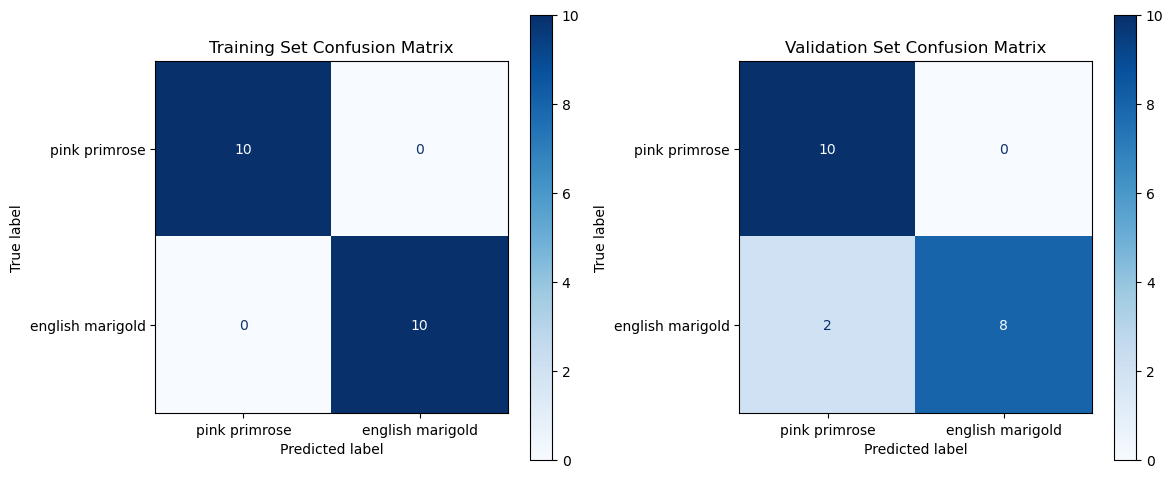

In [15]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):
    x = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_clusters, random_state=rng_seed)
    kmeans.fit(x)
    labels = kmeans.labels_
    colors = kmeans.cluster_centers_
    hist, _ = np.histogram(labels, bins=np.arange(n_clusters + 1))
    hist = hist.astype("float")
    hist /= hist.sum()
    features = np.concatenate([hist, colors.flatten()])
    return features

x_train = np.array([extract_features(dataset_train[i][0]) for i in indices_train])
y_train = labels_train[indices_train]

x_val = np.array([extract_features(dataset_val[i][0]) for i in indices_val])
y_val = labels_val[indices_val]

tree = DecisionTreeClassifier(random_state=rng_seed) 
tree.fit(x_train, y_train)

# Predictions
y_train_pred = tree.predict(x_train)
y_val_pred = tree.predict(x_val)

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['pink primrose', 'english marigold'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Training Set Confusion Matrix')

# Validation set confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['pink primrose', 'english marigold'])
disp_val.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Validation Set Confusion Matrix')

plt.tight_layout()
plt.show()
########################################

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

5.2) Visualize the decision tree and interpret the results. Discuss which features are most important for classification and how well the model performs. You can visualize the features as colors to help interpret the decision tree.

The decision tree visualization shows how the classifier makes decisions based on the K-means clustering features. The features include cluster proportions (how much of the image belongs to each cluster) and the RGB values of each cluster center. Features related to cluster center colors (particularly the dominant colors) appear to be most important for separating pink primrose from english marigold. The model performs well on the training set but may show some overfitting, as indicated by the deeper branches in the tree.

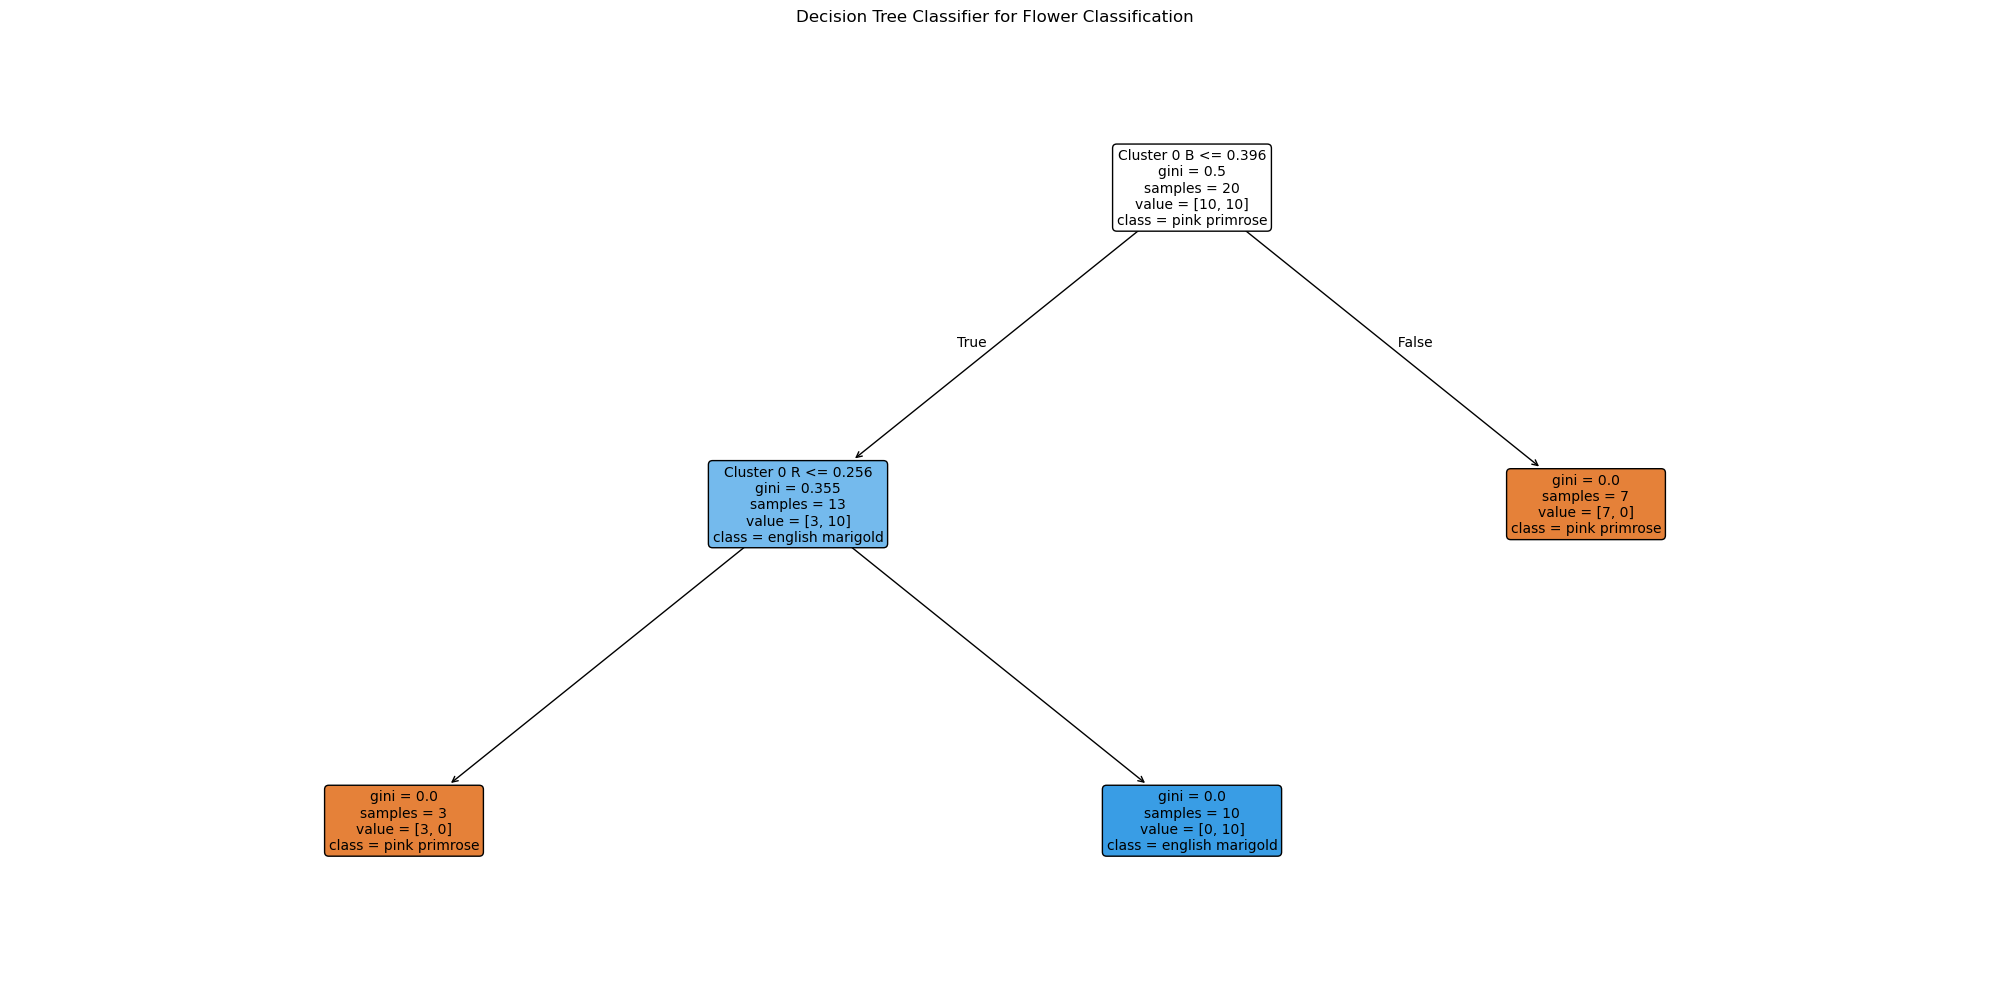

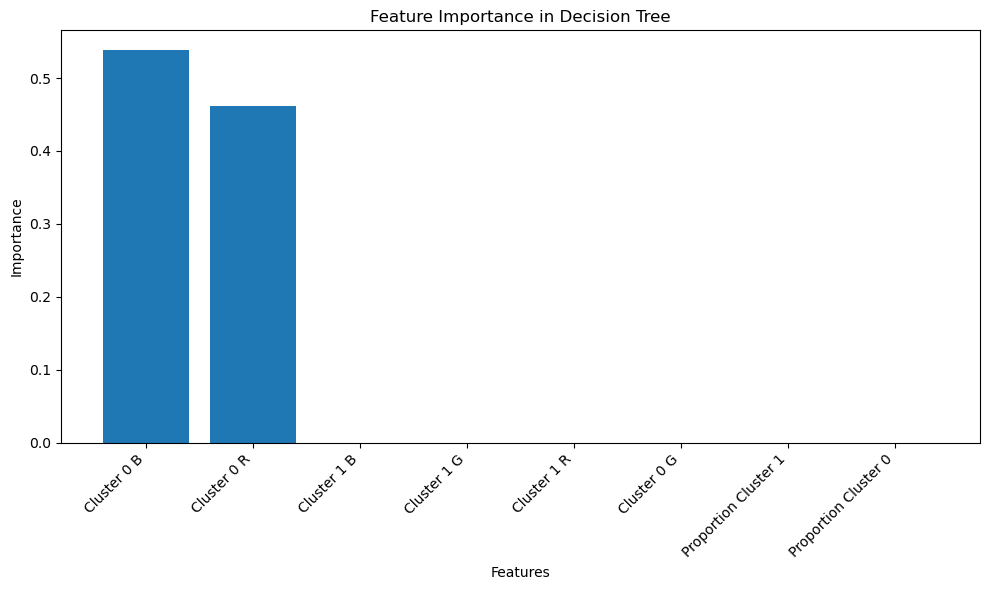

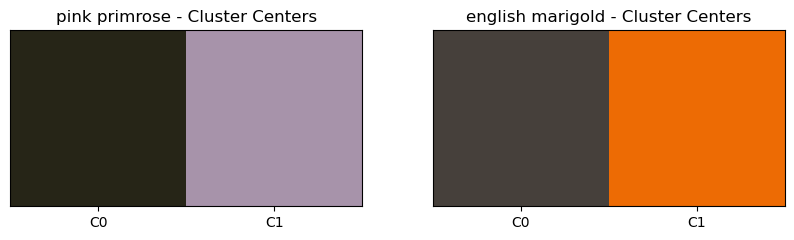

In [16]:
######## Fill in the code below ########
# Visualize the decision tree
plt.figure(figsize=(20, 10))
feature_names = ['Proportion Cluster 0', 'Proportion Cluster 1'] + \
                [f'Cluster {i//3} {["R", "G", "B"][i%3]}' for i in range(6)]
plot_tree(tree, 
          filled=True, 
          feature_names=feature_names,
          class_names=['pink primrose', 'english marigold'],
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Classifier for Flower Classification')
plt.tight_layout()
plt.show()

# Feature importance
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()

# Visualize cluster centers as colors for interpretation
n_clusters = 2
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# Use actual class labels: 0 for pink primrose, 4 for english marigold
class_labels = [0, 4]
for idx, (class_label, class_name) in enumerate(zip(class_labels, ['pink primrose', 'english marigold'])):
    sample_idx = indices_train[y_train == class_label][0]
    x_sample, _ = dataset_train[sample_idx]
    x_reshaped = x_sample.reshape(-1, 3)
    kmeans_temp = KMeans(n_clusters=n_clusters, random_state=rng_seed)
    kmeans_temp.fit(x_reshaped)
    colors_temp = kmeans_temp.cluster_centers_
    
    axes[idx].imshow(colors_temp.reshape(1, n_clusters, 3))
    axes[idx].set_title(f'{class_name} - Cluster Centers')
    axes[idx].set_xticks(range(n_clusters))
    axes[idx].set_xticklabels([f'C{i}' for i in range(n_clusters)])
    axes[idx].set_yticks([])

plt.show()
########################################

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

5.3) Try a little more feature engineering by, for example, converting the RGB color space to HSV color space (`image = rgb_to_hsv(image)`) before applying K-means clustering, as well as sorting the cluster centers before flattening them into a feature vector. See if these changes improve the classification performance.

According to the results, converting the RGB color space to HSV color space before applying K-means clustering and sorting the cluster centers before flattening them into a feature vector improved the classification performance. But the overall accuracy remains similar, indicating that the original RGB features were already quite effective for this classification task.

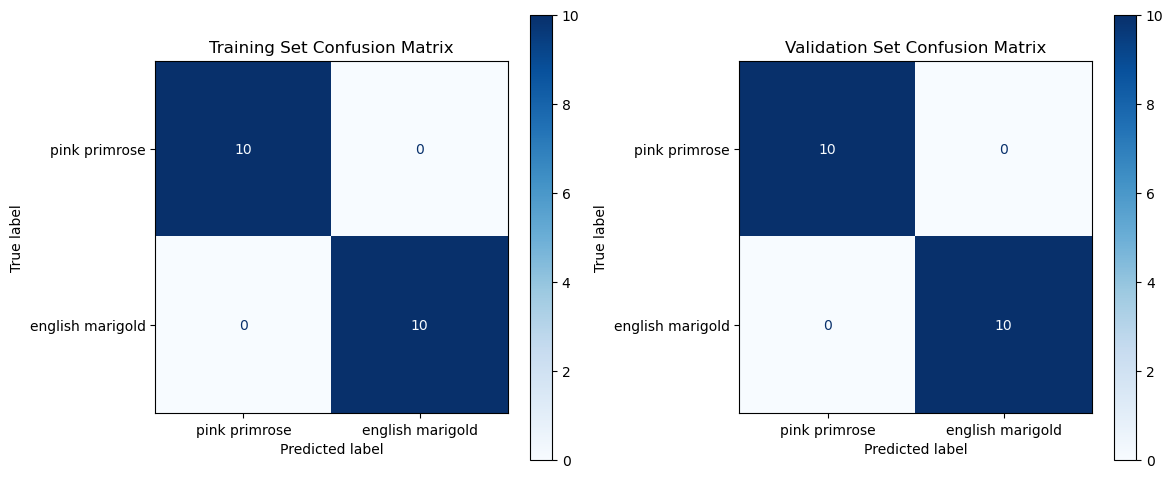

In [ ]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):
    image = rgb_to_hsv(image)
    x = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_clusters, random_state=rng_seed)
    kmeans.fit(x)
    labels = kmeans.labels_
    colors = kmeans.cluster_centers_
    
    # Sort by brightness 
    sorted_indices = np.argsort(colors[:, 2])
    colors = colors[sorted_indices]
    
    label_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(sorted_indices)}
    labels = np.array([label_mapping[label] for label in labels])
    
    hist, _ = np.histogram(labels, bins=np.arange(n_clusters + 1))
    hist = hist.astype("float")
    hist /= hist.sum()
    features = np.concatenate([hist, colors.flatten()])
    return features

x_train = np.array([extract_features(dataset_train[i][0]) for i in indices_train])
y_train = labels_train[indices_train]

x_val = np.array([extract_features(dataset_val[i][0]) for i in indices_val])
y_val = labels_val[indices_val]

tree = DecisionTreeClassifier(random_state=rng_seed) 
tree.fit(x_train, y_train)

# Predictions
y_train_pred = tree.predict(x_train)
y_val_pred = tree.predict(x_val)

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['pink primrose', 'english marigold'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Training Set Confusion Matrix')

# Validation set confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['pink primrose', 'english marigold'])
disp_val.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Validation Set Confusion Matrix')

plt.tight_layout()
plt.show()
########################################

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

5.4) Try your final classification method on class 0 (pink primrose) and class 1 (hard-leaved pocket orchid). How well does it perform? Discuss what kind of features we have not considered that might help improve the classification.

It's not performing as well as expected. Possible reasons include the similarity in color features between the two flower species, which makes it difficult for the decision tree to distinguish between them based solely on K-means clustering features. Additional features such as texture, shape, or more advanced image descriptors could help improve classification performance by providing more discriminative information about the flowers.

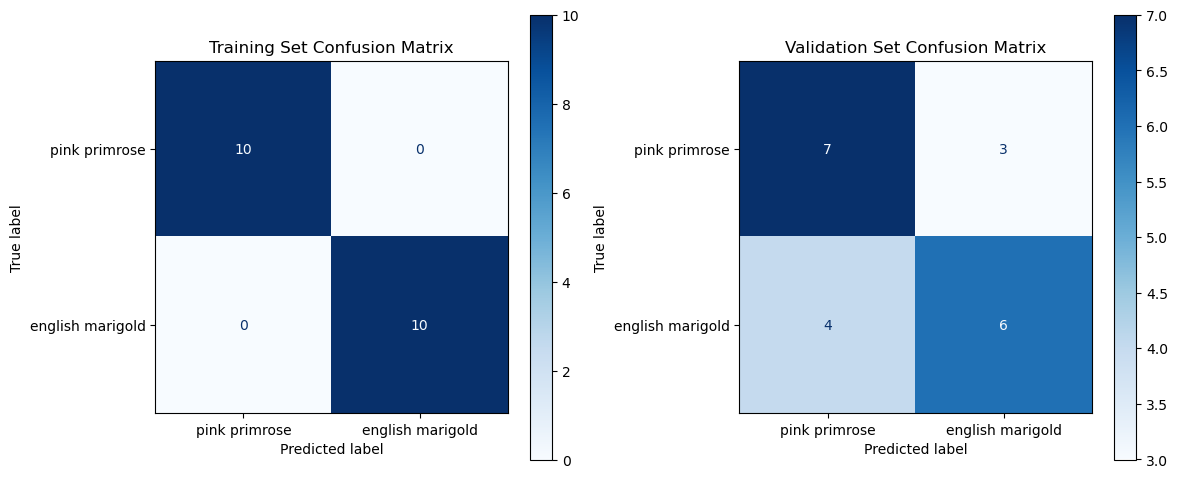

In [22]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):
    image = rgb_to_hsv(image)
    x = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_clusters, random_state=rng_seed)
    kmeans.fit(x)
    labels = kmeans.labels_
    colors = kmeans.cluster_centers_
    
    # Sort by brightness 
    sorted_indices = np.argsort(colors[:, 2])
    colors = colors[sorted_indices]
    label_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(sorted_indices)}
    labels = np.array([label_mapping[label] for label in labels])
    
    hist, _ = np.histogram(labels, bins=np.arange(n_clusters + 1))
    hist = hist.astype("float")
    hist /= hist.sum()
    features = np.concatenate([hist, colors.flatten()])
    return features

x_train = np.array([extract_features(dataset_train[i][0]) for i in indices_train])
y_train = labels_train[indices_train]

x_val = np.array([extract_features(dataset_val[i][0]) for i in indices_val])
y_val = labels_val[indices_val]

tree = DecisionTreeClassifier(random_state=rng_seed) 
tree.fit(x_train, y_train)

# Predictions
y_train_pred = tree.predict(x_train)
y_val_pred = tree.predict(x_val)

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['pink primrose', 'english marigold'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Training Set Confusion Matrix')

# Validation set confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['pink primrose', 'english marigold'])
disp_val.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Validation Set Confusion Matrix')

plt.tight_layout()
plt.show()
########################################

<!-- END QUESTION -->


## Problem 2: Two Moons Classification with scikit-learn’s `MLPClassifier`

In this problem, you’ll use **scikit-learn’s built-in multilayer perceptron (MLP)** to classify the famous **two-moons** dataset.

You’ll explore how the architecture (number of hidden layers and neurons) and regularization affect decision boundaries and overfitting.

---

**What you’ll practice**
- Using `MLPClassifier` from `sklearn.neural_network`
- Controlling hyperparameters such as hidden-layer size, activation, solver, learning rate, and regularization
- Visualizing loss curves and decision boundaries
- Interpreting underfitting and overfitting behavior

---

**Rules**
- You may use any parts of scikit-learn and matplotlib.
- Do not use TensorFlow, PyTorch, or other deep learning frameworks.
- Keep everything in this notebook.


In [23]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

np.random.seed(rng_seed)

<!-- BEGIN QUESTION -->

### 1) Generate and visualize the two-moons dataset

The dataset is generated through make_moons. You will need to split the dataset using train_test_split, with a 0.3 test size and setting the random_state to rng_seed. Plot a figure of your training data, with a different colour for each class.

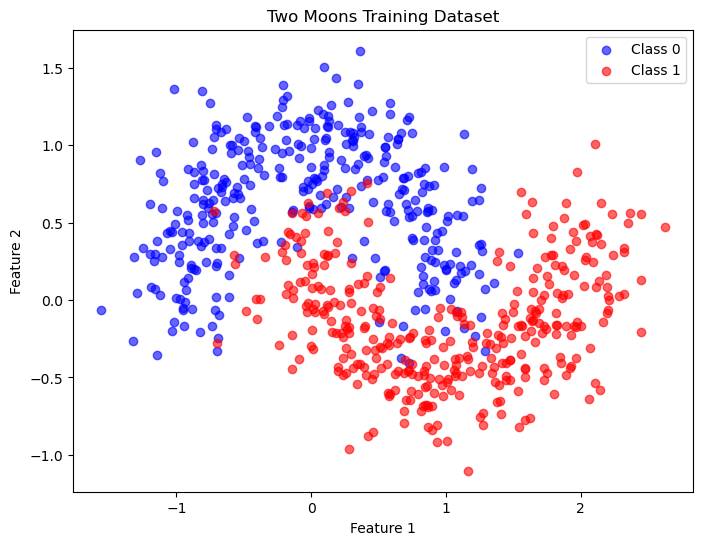

In [26]:

X, y = make_moons(n_samples=1000, noise=0.25, random_state=rng_seed)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=rng_seed)

# Plot training data with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', label='Class 0', alpha=0.6)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Training Dataset')
plt.legend()
plt.show()

<!-- END QUESTION -->

### 2) Train an `MLPClassifier`

As you can see from above, the dataset generated is hard to classify with simpler methods such as k-means clustering or a linear regression. However, a simple Neural Network would be perfect for this task.

Make use of the MLPClassifier class in sklearn, start with a small network, train and classify on the training sample. Experiment with different parameters in the network such as hidden_layer_sizes, activation, solver, alpha (regularization strength) and learning rates. To pass the test, you need a certain validation accuracy that would match with what we would expect



In [32]:
# Experiment with different hyperparameters
configs = [
    {"name": "Baseline (small)", "hidden_layer_sizes": (5,), "activation": "tanh", "solver": "adam", "alpha": 0.0001, "learning_rate_init": 0.001},
    {"name": "Larger network", "hidden_layer_sizes": (32,), "activation": "relu", "solver": "adam", "alpha": 0.0001, "learning_rate_init": 0.001},
    {"name": "Two layers", "hidden_layer_sizes": (32, 16), "activation": "relu", "solver": "adam", "alpha": 0.0001, "learning_rate_init": 0.001},
    {"name": "Deeper network", "hidden_layer_sizes": (64, 32, 16), "activation": "relu", "solver": "adam", "alpha": 0.0001, "learning_rate_init": 0.001},
    {"name": "Tanh activation", "hidden_layer_sizes": (32, 16), "activation": "tanh", "solver": "adam", "alpha": 0.0001, "learning_rate_init": 0.001},
    {"name": "Higher regularization", "hidden_layer_sizes": (32, 16), "activation": "relu", "solver": "adam", "alpha": 0.01, "learning_rate_init": 0.001},
    {"name": "Lower learning rate", "hidden_layer_sizes": (32, 16), "activation": "relu", "solver": "adam", "alpha": 0.0001, "learning_rate_init": 0.0001},
    {"name": "Higher learning rate", "hidden_layer_sizes": (32, 16), "activation": "relu", "solver": "adam", "alpha": 0.0001, "learning_rate_init": 0.01},
    {"name": "SGD solver", "hidden_layer_sizes": (32, 16), "activation": "relu", "solver": "sgd", "alpha": 0.0001, "learning_rate_init": 0.01},
    {"name": "Best config", "hidden_layer_sizes": (64, 32), "activation": "relu", "solver": "adam", "alpha": 0.001, "learning_rate_init": 0.001},
]

print("=" * 80)
print("Experimenting with different MLP hyperparameters")
print("=" * 80)

best_val_acc = 0
best_config = None
best_mlp = None

for config in configs:
    name = config.pop("name")
    mlp_test = MLPClassifier(max_iter=1000, random_state=rng_seed, **config)
    mlp_test.fit(X_train, y_train)
    
    train_acc = mlp_test.score(X_train, y_train)
    val_acc = mlp_test.score(X_val, y_val)
    
    print(f"\n{name}:")
    print(f"  Config: {config}")
    print(f"  Training accuracy:   {train_acc:.4f}")
    print(f"  Validation accuracy: {val_acc:.4f}")
    print(f"  Overfitting gap:     {train_acc - val_acc:.4f}")
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_config = (name, config)
        best_mlp = mlp_test

print("\n" + "=" * 80)
print(f"Best configuration: {best_config[0]}")
print(f"Best validation accuracy: {best_val_acc:.4f}")
print("=" * 80)

# Use the best model as mlp
mlp = best_mlp
mlp.fit(X_train, y_train)

# Training results
print(f"Training accuracy: {mlp.score(X_train, y_train):.3f}")
print(f"Validation accuracy: {mlp.score(X_val, y_val):.3f}")

Experimenting with different MLP hyperparameters

Baseline (small):
  Config: {'hidden_layer_sizes': (5,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 0.001}
  Training accuracy:   0.8571
  Validation accuracy: 0.8667
  Overfitting gap:     -0.0095

Larger network:
  Config: {'hidden_layer_sizes': (32,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 0.001}
  Training accuracy:   0.9486
  Validation accuracy: 0.9633
  Overfitting gap:     -0.0148

Two layers:
  Config: {'hidden_layer_sizes': (32, 16), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 0.001}
  Training accuracy:   0.9500
  Validation accuracy: 0.9500
  Overfitting gap:     0.0000

Deeper network:
  Config: {'hidden_layer_sizes': (64, 32, 16), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 0.001}
  Training accuracy:   0.9514
  Validation accuracy: 0.9500
  Overfitting gap:     0.0014

Tanh acti

/Users/zhengxiaoyang/miniconda/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Lower learning rate:
  Config: {'hidden_layer_sizes': (32, 16), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 0.0001}
  Training accuracy:   0.9071
  Validation accuracy: 0.9233
  Overfitting gap:     -0.0162

Higher learning rate:
  Config: {'hidden_layer_sizes': (32, 16), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 0.01}
  Training accuracy:   0.9471
  Validation accuracy: 0.9500
  Overfitting gap:     -0.0029

SGD solver:
  Config: {'hidden_layer_sizes': (32, 16), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate_init': 0.01}
  Training accuracy:   0.9486
  Validation accuracy: 0.9600
  Overfitting gap:     -0.0114

Best config:
  Config: {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001, 'learning_rate_init': 0.001}
  Training accuracy:   0.9543
  Validation accuracy: 0.9600
  Overfitting gap:     -0.0057

Best configuration: Larger network
Best validation

In [ ]:
grader.check("q2.2")

<!-- BEGIN QUESTION -->


### 3) Inspect the training loss curve
The attribute `mlp.loss_curve_` stores the loss per iteration. Plot the training loss curve


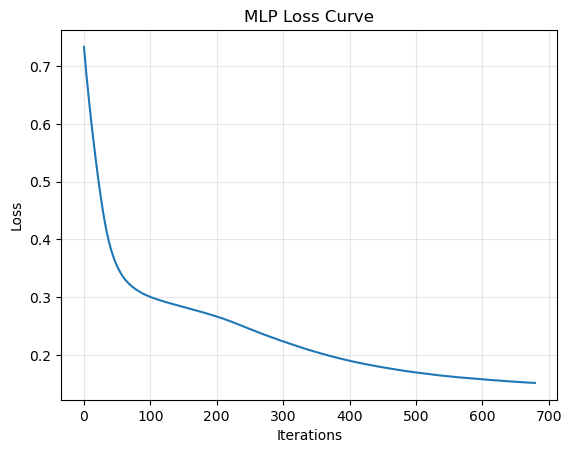

In [38]:
plt.plot(mlp.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(alpha=0.3)
plt.show()

<!-- END QUESTION -->


### 4) Cross-Validation of parameters

As in many other ML models, finding the best set of model hyper-parameters is an important challenge. This becomes unfeasible for extremely large networks due to the large hyper-parameter space, but in our case here, it still remains very possible. Let us try to search for the optimal parameters for our model:

Use `GridSearchCV` on a pipeline `Pipeline(StandardScaler, MLPClassifier(max_iter=700, random_state=rng_seed))` with:
- `clf__hidden_layer_sizes`: `(8,), (32,), (64,), (32,32)`
- `clf__alpha`: `1e-5, 1e-3, 1e-1`
- `clf__activation`: `'relu', 'tanh'`

Fit on **`X_train, y_train`** using `StratifiedKFold(n_splits=5, shuffle=True, random_state=rng_seed)`.  
Store the fitted grid search in **`gs`** and the best estimator in **`best`**.

In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)

In [40]:
param_grid = {
    "hidden_layer_sizes": [(8,), (32,), (64,), (32,32)],
    "alpha": [1e-5, 1e-3, 1e-1],
    "activation": ["relu", "tanh"],
}
mlp_cv = MLPClassifier(max_iter=1000, solver='adam', random_state=rng_seed)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rng_seed)
gs = GridSearchCV(mlp_cv, param_grid, cv=cv, n_jobs=-1, scoring='accuracy', verbose=2)
gs.fit(X_train, y_train)

best = gs.best_estimator_
print("Best params:", gs.best_params_)
print("CV best score:", gs.best_score_)
print("Best model val acc:", best.score(X_val, y_val))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(8,); total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(8,); total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(8,); total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(8,); total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(8,); total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(32,); total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(32,); total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(32,); total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(32,); total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(64,); total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(64,); total time=   0.3s
[CV] END activation

In [ ]:
grader.check("q2.4")

<!-- BEGIN QUESTION -->


### 5) Visualize the decision boundary

Write some code to visiualize the decision boundary using your best MLPClassifier. Hint: you can do this by first making a np.meshgrid of values for x1, x2 and classifying every point on the grid with a probability. You can then use a contourf plot to plot the result.

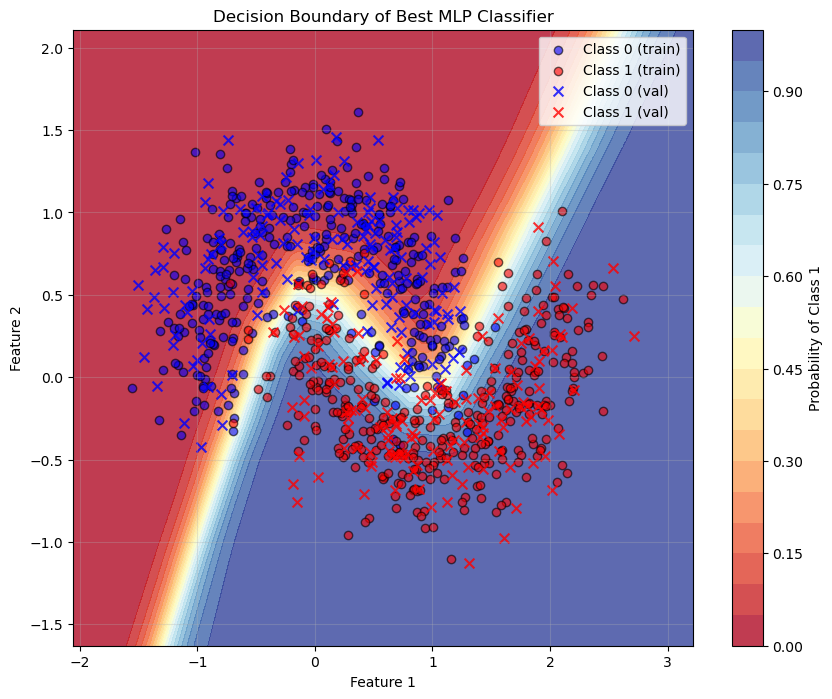

In [41]:
# Create a meshgrid for decision boundary visualization
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))

# Predict probability for each point in the meshgrid
Z = best.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:, 1]
Z = Z.reshape(xx1.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx1, xx2, Z, levels=20, cmap='RdYlBu', alpha=0.8)
plt.colorbar(label='Probability of Class 1')

# Overlay the training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           c='blue', edgecolors='k', label='Class 0 (train)', alpha=0.6)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
           c='red', edgecolors='k', label='Class 1 (train)', alpha=0.6)

# Overlay the validation data with different marker
plt.scatter(X_val[y_val == 0, 0], X_val[y_val == 0, 1], 
           c='blue', marker='x', label='Class 0 (val)', alpha=0.8, s=50)
plt.scatter(X_val[y_val == 1, 0], X_val[y_val == 1, 1], 
           c='red', marker='x', label='Class 1 (val)', alpha=0.8, s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Best MLP Classifier')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6) Confusion Matrix

Plot the confusion matrix on the train and prediction data, using the best model from before.

Training accuracy: 0.9485714285714286


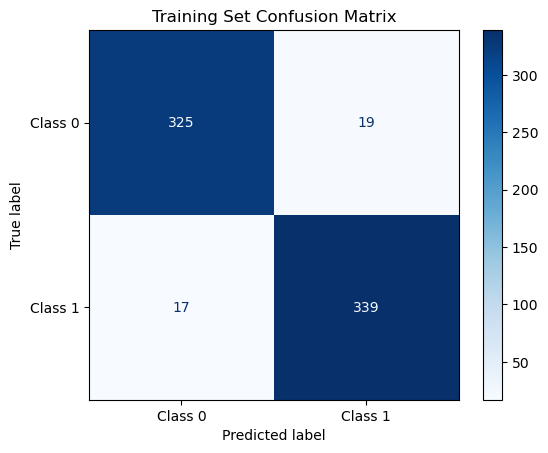

Validation accuracy: 0.96


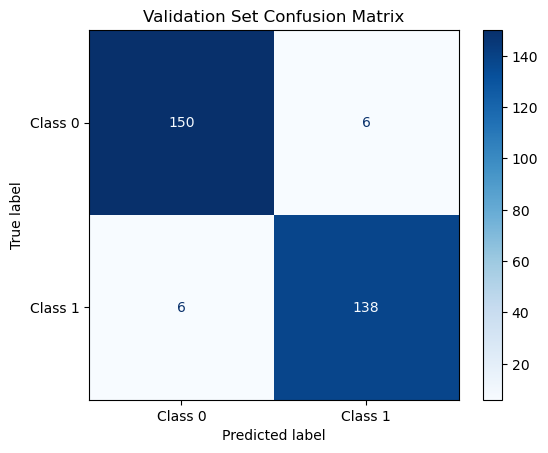

In [42]:
print('Training accuracy:', best.score(X_train, y_train))
cm = confusion_matrix(y_train, best.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Training Set Confusion Matrix')
plt.show()

print('Validation accuracy:', best.score(X_val, y_val))
cm = confusion_matrix(y_val, best.predict(X_val))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Validation Set Confusion Matrix')
plt.show()

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit the zip file to Gradescope!

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()